# Public Transport Project Group 2


# DATA PREPERATION

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/ProjectAssignmentData/Dataset-PT.csv'
df = pd.read_csv(url)

df.head(10)

<ipython-input-2-7c9056571cc2>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Basic information,Unnamed: 1,Unnamed: 2,Unnamed: 3,Responsible variable,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
1,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
5,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1
6,20220108,4,41344,6,260,13,105,38,242,100,...,0,0,0,0,1,0,1,0,0,1
7,20220108,4,41344,7,278,12,43,79,260,100,...,0,0,0,0,1,0,1,0,0,1
8,20220108,4,41344,8,272,8,85,97,278,100,...,0,0,0,0,1,0,1,0,0,1
9,20220108,4,41344,9,292,24,83,47,272,100,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
df['Unnamed: 15']

,Unnamed: 15
0,temperature
1,Normal
2,Normal
3,Normal
4,Normal
...,...
545099,Normal
545100,Normal
545101,Normal
545102,Normal


In [ ]:
df.info() # shows data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545104 entries, 0 to 545103
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Basic information                        545104 non-null  object
 1   Unnamed: 1                               545104 non-null  object
 2   Unnamed: 2                               545104 non-null  object
 3   Unnamed: 3                               545104 non-null  object
 4   Responsible variable                     545104 non-null  object
 5   Unnamed: 5                               545104 non-null  object
 6   Unnamed: 6                               545104 non-null  object
 7   Unnamed: 7                               545104 non-null  object
 8   Unnamed: 8                               545104 non-null  object
 9   Unnamed: 9                               545104 non-null  object
 10  Unnamed: 10                              545

The data has no values, and the first row has to be removed to get the actual parameters.

However the info here shows that we need to use data differently.

Forexample are dummy variables int or float.
Categorical variables are=
Responsible varibles:

In [ ]:
df.columns = df.loc[0]  # Set new column names
df = df.drop(index=0)   # Drop the row that was used for column names
df = df.reset_index(drop=True)  # Reset the index
df

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,20220630,4,41362,23,344,13,74,44,341,12,...,0,0,0,0,1,1,0,0,0,1
545099,20220630,4,41362,24,330,15,34,92,344,12,...,0,0,0,0,1,1,0,0,0,1
545100,20220630,4,41362,25,339,17,63,43,330,12,...,0,0,0,0,1,1,0,0,0,1
545101,20220630,4,41362,26,331,0,35,58,339,12,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
df['temperature']

,temperature
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
545098,Normal
545099,Normal
545100,Normal
545101,Normal


Should we combine the data? Some parts are very similar.

In [ ]:
df.info() # shows data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545103 entries, 0 to 545102
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Calendar_date                      545103 non-null  object
 1   route_id                           545103 non-null  object
 2   bus_id                             545103 non-null  object
 3   stop_sequence                      545103 non-null  object
 4   arrival_delay                      545103 non-null  object
 5   dwell_time                         545103 non-null  object
 6   travel_time_for_previous_section   545103 non-null  object
 7   scheduled_travel_time              545103 non-null  object
 8   upstream_stop_delay                545103 non-null  object
 9   origin_delay                       545103 non-null  object
 10  previous_bus_delay                 545103 non-null  object
 11  previous_trip_travel_time          545103 non-null  

In [ ]:
# List of columns to convert to float64 or int64
numeric_columns = [
    'arrival_delay', 'dwell_time',
    'travel_time_for_previous_section', 'scheduled_travel_time',
    'upstream_stop_delay', 'origin_delay', 'previous_bus_delay',
    'previous_trip_travel_time']

# List of columns to convert to int64 (assuming they are binary indicators)
binary_columns = [
    'factor(weather)Light_Rain', 'factor(weather)Light_Snow',
    'factor(weather)Normal', 'factor(weather)Rain',
    'factor(weather)Snow', 'factor(temperature)Cold',
    'factor(temperature)Extra_cold', 'factor(temperature)Normal',
    'factor(day_of_week)weekday', 'factor(day_of_week)weekend',
    'factor(time_of_day)Afternoon_peak', 'factor(time_of_day)Morning_peak',
    'factor(time_of_day)Off-peak']

# Convert numeric columns to float64
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').astype('float64')

# Convert binary columns to int64
df[binary_columns] = df[binary_columns].apply(pd.to_numeric, errors='coerce').astype('int64')

print(df.dtypes)


0
Calendar_date                         object
route_id                              object
bus_id                                object
stop_sequence                         object
arrival_delay                        float64
dwell_time                           float64
travel_time_for_previous_section     float64
scheduled_travel_time                float64
upstream_stop_delay                  float64
origin_delay                         float64
previous_bus_delay                   float64
previous_trip_travel_time            float64
traffic_condition                     object
recurrent_delay                       object
weather                               object
temperature                           object
day_of_week                           object
time_of_day                           object
factor(weather)Light_Rain              int64
factor(weather)Light_Snow              int64
factor(weather)Normal                  int64
factor(weather)Rain                    int64
factor(w

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'Calendar_date': ['20220108' '20220109' '20220110' '20220111' '20220112' '20220113'
 '20220114' '20220115' '20220116' '20220117' '20220118' '20220119'
 20220119 20220120 20220121 20220122 20220123 20220124 20220125 20220126
 20220127 20220128 20220129 20220130 20220131 20220201 20220202 20220203
 20220204 20220205 20220206 20220207 20220208 20220209 20220210 20220211
 20220212 20220213 20220214 20220215 20220216 20220217 20220218 20220219
 20220220 20220221 20220222 20220223 20220224 20220225 20220226 20220227
 20220228 20220301 20220302 20220303 20220304 20220305 20220306 20220307
 20220308 20220309 20220310 20220311 20220312 20220313 20220314 20220315
 20220316 20220317 20220318 20220319 20220320 20220321 20220322 20220323
 20220324 20220325 20220326 20220328 20220329 20220330 20220331 20220401
 20220402 20220403 20220404 20220405 20220406 20220407 20220408 20220409
 20220410 20220411 20220412 20220413 20220414 20220415 20220416 20220417
 20220418 20220419 20220420 2

In [ ]:
df.describe()

,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,factor(weather)Light_Rain,factor(weather)Light_Snow,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
count,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,...,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000,545103.000000
mean,134.972238,31.994665,71.440968,105.918404,135.651912,75.107237,134.379284,73.183840,0.024469,0.017831,...,0.006191,0.006786,0.112735,0.017931,0.869335,0.767101,0.232899,0.208678,0.164892,0.626430
std,193.899487,27.215700,37.590646,36.420995,190.271573,133.625958,193.635484,35.678285,0.154499,0.132339,...,0.078442,0.082097,0.316268,0.132699,0.337034,0.422679,0.422679,0.406364,0.371083,0.483752
min,-3493.000000,0.000000,0.000000,38.000000,-3403.000000,-3061.000000,-3493.000000,-2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,17.000000,45.000000,75.000000,14.000000,15.000000,11.000000,46.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,25.000000,64.000000,104.000000,86.000000,27.000000,88.000000,64.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,209.000000,41.000000,93.000000,129.000000,206.000000,68.000000,208.000000,93.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2257.000000,1616.000000,1069.000000,198.000000,2257.000000,1812.000000,2230.000000,1069.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df.drop(['Calendar_date', 'route_id', 'bus_id', 'stop_sequence',
              'weather', 'traffic_condition', 'recurrent_delay', 'temperature',
              'day_of_week', 'time_of_day'], axis=1)
df

,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,factor(weather)Light_Rain,factor(weather)Light_Snow,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,151.0,0.0,0.0,120.0,100.0,100.0,160.0,216.0,0,1,...,0,0,0,0,1,0,1,0,0,1
1,185.0,24.0,171.0,45.0,151.0,100.0,198.0,47.0,0,1,...,0,0,0,0,1,0,1,0,0,1
2,186.0,0.0,55.0,41.0,185.0,100.0,189.0,32.0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,202.0,12.0,42.0,94.0,186.0,100.0,200.0,89.0,0,1,...,0,0,0,0,1,0,1,0,0,1
4,242.0,21.0,98.0,86.0,202.0,100.0,256.0,123.0,0,1,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,344.0,13.0,74.0,44.0,341.0,12.0,47.0,26.0,0,0,...,0,0,0,0,1,1,0,0,0,1
545099,330.0,15.0,34.0,92.0,344.0,12.0,68.0,93.0,0,0,...,0,0,0,0,1,1,0,0,0,1
545100,339.0,17.0,63.0,43.0,330.0,12.0,69.0,27.0,0,0,...,0,0,0,0,1,1,0,0,0,1
545101,331.0,0.0,35.0,58.0,339.0,12.0,79.0,54.0,0,0,...,0,0,0,0,1,1,0,0,0,1


<Axes: xlabel='arrival_delay', ylabel='Count'>

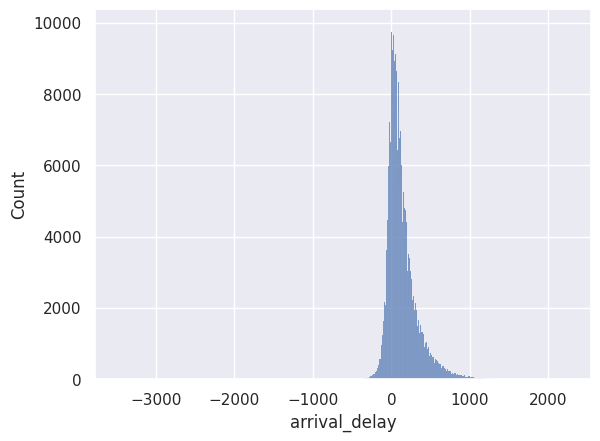

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['arrival_delay'])

From the plot above, and the values of the arrival delay, we can see that there are very large outliers. MAYBE REMOVE THME??

In [ ]:
corr_matrix = df.corr() # correlation matrix
corr_matrix['arrival_delay'].sort_values(ascending=False)

,arrival_delay
0,
arrival_delay,1.000000
upstream_stop_delay,0.975019
origin_delay,0.716324
previous_bus_delay,0.265434
factor(day_of_week)weekend,0.190783
factor(time_of_day)Off-peak,0.138109
dwell_time,0.089433
travel_time_for_previous_section,0.081113
factor(weather)Normal,0.022642


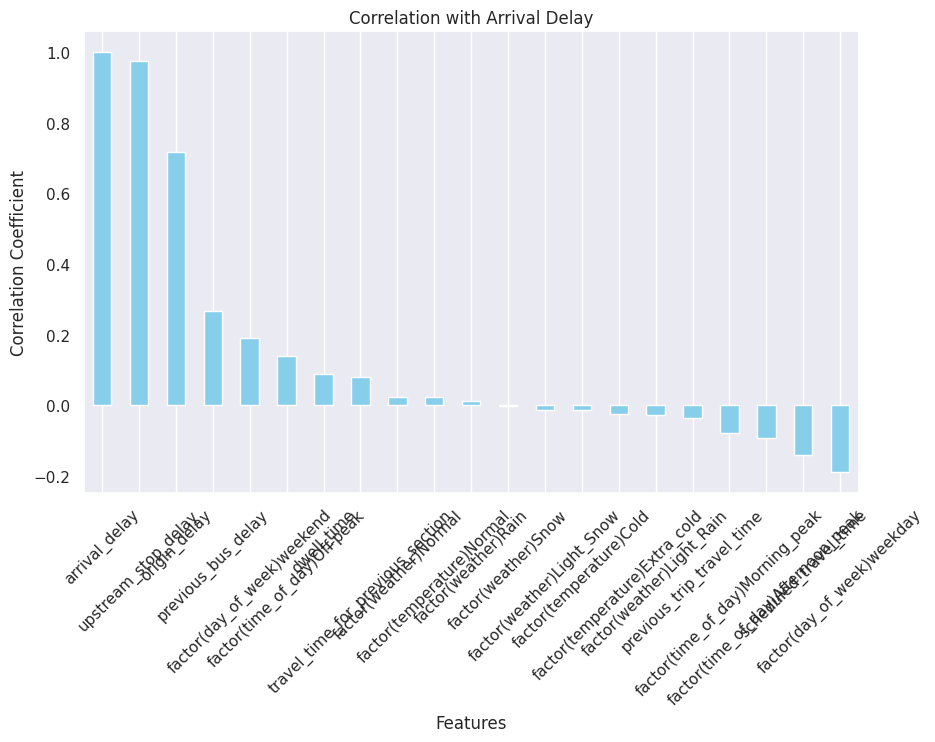

In [ ]:
corr_matrix = df.corr()
arrival_delay_corr = corr_matrix['arrival_delay'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
arrival_delay_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Arrival Delay')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
x = df.drop(['arrival_delay'], axis=1)
y = df['arrival_delay']

#sns.pairplot(x)

In [ ]:
df['upstream_delay_incl_dwell'] = df['upstream_stop_delay'] + df['dwell_time']
df = df.dropna()

# show correlation matrix
corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

,arrival_delay
0,
arrival_delay,1.000000
upstream_delay_incl_dwell,0.986756
upstream_stop_delay,0.975019
origin_delay,0.716324
previous_bus_delay,0.265434
factor(day_of_week)weekend,0.190783
factor(time_of_day)Off-peak,0.138109
dwell_time,0.089433
travel_time_for_previous_section,0.081113


# Train Regression Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'x' contains your features and 'y' contains your target variable

# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Optional: Print coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 539.9478
Mean Absolute Error: 15.5215
R-squared: 0.9856
Coefficients: [ 1.01798297e+00 -2.68011734e-02 -7.36343934e-01  1.00006715e+00
  5.82674812e-04  1.05500439e-03  5.63628442e-01 -1.42104527e-01
  5.43023368e-02 -1.13456170e-01  2.24771976e-01 -2.35136171e-02
  3.58986038e-01  2.74124028e-01 -6.33110066e-01 -2.92066299e-01
  2.92066299e-01 -8.07226867e-01  7.54340402e-01  5.28864642e-02]
Intercept: 5.985501543821158


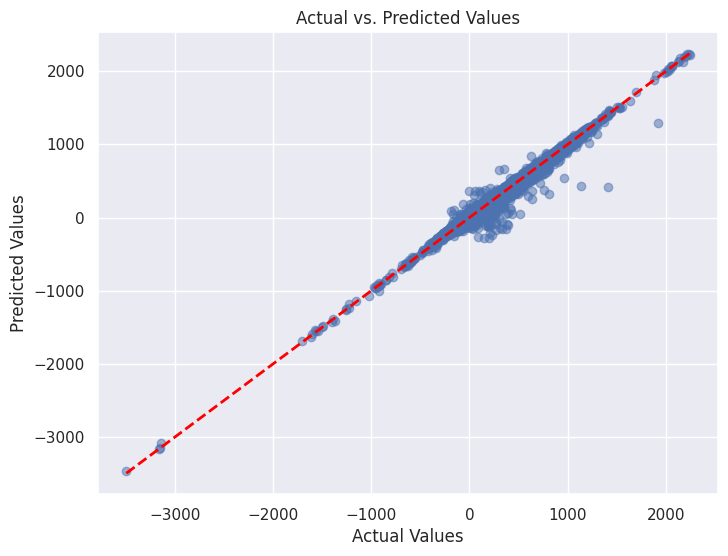

In [ ]:

# Plot predicted vs actual output
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
  'eta': [0.075, 0.1], # learning rate
  'gamma': [5, 6, 7], # minimum loss reduction for partition
  'max_depth': [3, 5, 7], # maximum depth of a tree
  'min_child_weight':	[0], # minimum sum of weights of observations required in a child
  'subsample':	[0.75, 0.8, 1], # subsample ratio of the training instances
}

# Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5, verbose=2) #cv = cross-validation

#Fit model
grid_search.fit(X_train, y_train)
#Obtain best parameters and best model
best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_?


print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.75; total time=   4.3s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.75; total time=   2.5s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.75; total time=   2.5s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.75; total time=   4.2s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.75; total time=   2.9s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.8; total time=   2.5s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.8; total time=   2.7s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.8; total time=   2.5s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsample=0.8; total time=   4.7s
[CV] END eta=0.075, gamma=5, max_depth=3, min_child_weight=0, subsamp

Mean Absolute Error: 14.73217303257251
Mean Squared Error: 854.9219431581823
R-squared: 0.9771360006524149


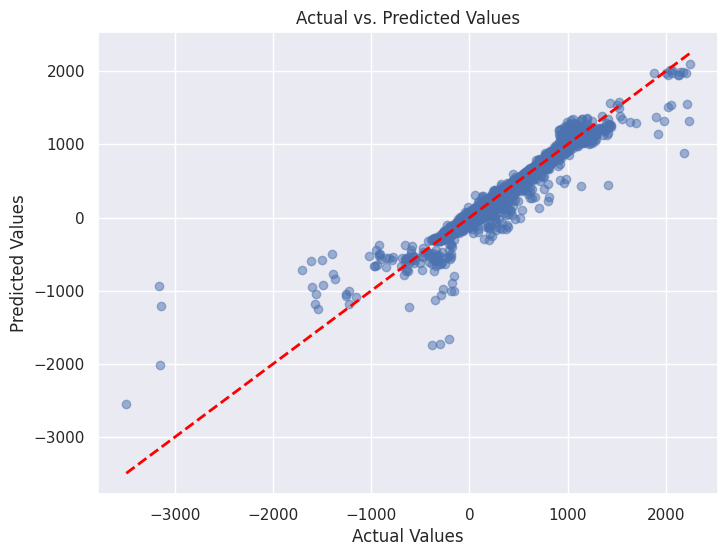

In [ ]:
# Train model
best_xgb = xgb.XGBRegressor(eta=best_params['eta'], gamma=best_params['gamma'], max_depth=best_params['max_depth'], min_child_weight=best_params['min_child_weight'], subsample=best_params['subsample'])
best_xgb.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs actual output
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()